### Review results of fine tuning Alexnet on food-101 data.

__Data Pre-Processing:__

All images were first rescaled to 256 x 256, and each class of 1,000 images was split into:

- Training - 664 images
- Validation - 136 images
- Testing - 200 images

__Four fine-tuning attempts:__

- Original dataset, only fine-tune FC layers
- Original dataset, only fine-tune FC layers; reduce dropout from 0.5 to 0.4
- Augmented dataset, fine-tune whole network
- Augmented dataset, only fine-tune FC layers

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import caffe
import os
import numpy as np
import sys

sys.path.append("/usr/local/caffe/tools/extra")
import parse_log as pl

sys.path.append('../')
import helpers.histogram_classifier as hc

In [2]:
from IPython.core.display import HTML
css = open('styles/table-style.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
prediction_mapping = eval(open('../transfer-learning/data/alexnet_3/class_mapping.txt', 'r').read())
reverse_prediction_mapping = { v:k for k,v in prediction_mapping.items() }
classes = [reverse_prediction_mapping[x] for x in range(12)]

true = []
with open("../transfer-learning/data/alexnet_3/test.txt", "r") as f:
    test_images = f.read().splitlines()

for x in test_images:
    true.append(reverse_prediction_mapping[int(x.split(" ")[1])])

### Attempt 1: Fully connected layers trained on original dataset

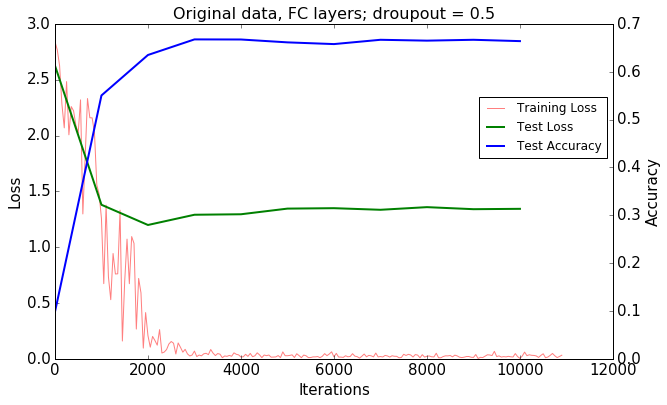

In [5]:
train_log, test_log = pl.parse_log("../transfer-learning/data/alexnet_4/train_3.log")
train_iters = [x['NumIters'] for x in train_log]
train_loss = [x['loss'] for x in train_log]
test_iters = [x['NumIters'] for x in test_log]
test_loss = [x['loss'] for x in test_log]
test_accuracy = [x['accuracy'] for x in test_log]
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting training and test losses
train_l ,= ax1.plot(train_iters, train_loss, color='red',  alpha=.5, label='Training loss')
test_l ,= ax1.plot(test_iters, test_loss, linewidth=2, color='green', label='Test loss')
#ax1.set_ylim(ymin=0, ymax=200)
ax1.set_xlabel('Iterations', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.tick_params(labelsize=15)
#Plotting test accuracy
ax2 = ax1.twinx()
test_acc ,= ax2.plot(test_iters, test_accuracy, linewidth=2, color='blue', label='Test accuracy')
#ax2.set_ylim(ymin=0, ymax=1)
ax2.set_ylabel('Accuracy', fontsize=15)
ax2.tick_params(labelsize=15)
#Adding legend
plt.legend([train_l, test_l, test_acc], ['Training Loss', 'Test Loss', 'Test Accuracy'],  bbox_to_anchor=(1, 0.8))
plt.title('Original data, FC layers; droupout = 0.5', fontsize=16)
plt.show()

##### Predictions on single test images:

In [6]:
predictions = np.load("../transfer-learning/data/alexnet_4/simple_3", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])
score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.678,0.676,0.677,0.678


##### Predictions on test images, + 4 crops + mirror images, and average across predictions

In [7]:
# Average of predictions on crops
predictions = np.load("../transfer-learning/data/alexnet_4/crops_3", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])

score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.705,0.703,0.704,0.705


### Attempt 2: Fully connected layers trained on original dataset, lower dropout

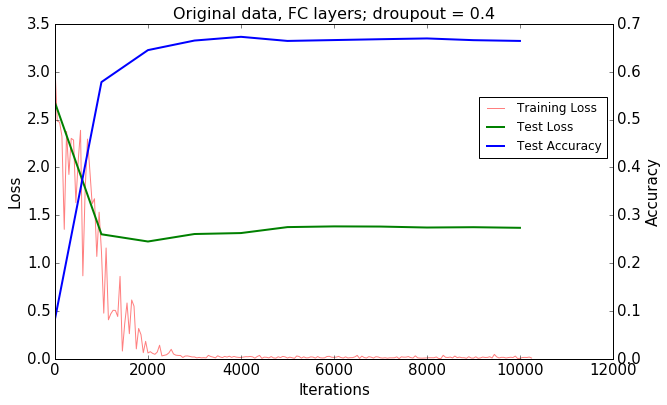

In [8]:
train_log, test_log = pl.parse_log("../transfer-learning/data/alexnet_4/train_4.log")
train_iters = [x['NumIters'] for x in train_log]
train_loss = [x['loss'] for x in train_log]
test_iters = [x['NumIters'] for x in test_log]
test_loss = [x['loss'] for x in test_log]
test_accuracy = [x['accuracy'] for x in test_log]
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting training and test losses
train_l ,= ax1.plot(train_iters, train_loss, color='red',  alpha=.5, label='Training loss')
test_l ,= ax1.plot(test_iters, test_loss, linewidth=2, color='green', label='Test loss')
#ax1.set_ylim(ymin=0, ymax=200)
ax1.set_xlabel('Iterations', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.tick_params(labelsize=15)
#Plotting test accuracy
ax2 = ax1.twinx()
test_acc ,= ax2.plot(test_iters, test_accuracy, linewidth=2, color='blue', label='Test accuracy')
#ax2.set_ylim(ymin=0, ymax=1)
ax2.set_ylabel('Accuracy', fontsize=15)
ax2.tick_params(labelsize=15)
#Adding legend
plt.legend([train_l, test_l, test_acc], ['Training Loss', 'Test Loss', 'Test Accuracy'],  bbox_to_anchor=(1, 0.8))
plt.title('Original data, FC layers; droupout = 0.4', fontsize=16)
plt.show()

In [9]:
##### Predictions on single test images:

In [10]:
predictions = np.load("../transfer-learning/data/alexnet_4/simple_4", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])
    
score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.688,0.685,0.686,0.688


In [11]:
##### Predictions on test images, + 4 crops + mirror images, and average across predictions

In [12]:
# Average of predictions on crops
predictions = np.load("../transfer-learning/data/alexnet_4/crops_4", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])
    
score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.708,0.707,0.708,0.708


### Attempt 3: Whole network trained on augmented data

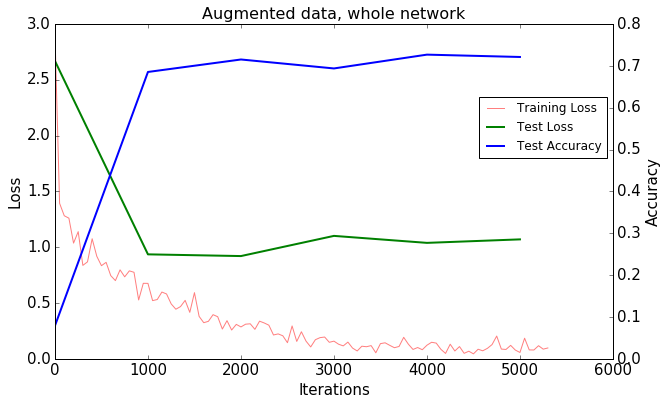

In [13]:
train_log, test_log = pl.parse_log("../transfer-learning/data/alexnet_4/train_7.log")
train_iters = [x['NumIters'] for x in train_log]
train_loss = [x['loss'] for x in train_log]
test_iters = [x['NumIters'] for x in test_log]
test_loss = [x['loss'] for x in test_log]
test_accuracy = [x['accuracy'] for x in test_log]
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting training and test losses
train_l ,= ax1.plot(train_iters, train_loss, color='red',  alpha=.5, label='Training loss')
test_l ,= ax1.plot(test_iters, test_loss, linewidth=2, color='green', label='Test loss')
#ax1.set_ylim(ymin=0, ymax=200)
ax1.set_xlabel('Iterations', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.tick_params(labelsize=15)
#Plotting test accuracy
ax2 = ax1.twinx()
test_acc ,= ax2.plot(test_iters, test_accuracy, linewidth=2, color='blue', label='Test accuracy')
#ax2.set_ylim(ymin=0, ymax=1)
ax2.set_ylabel('Accuracy', fontsize=15)
ax2.tick_params(labelsize=15)
#Adding legend
plt.legend([train_l, test_l, test_acc], ['Training Loss', 'Test Loss', 'Test Accuracy'],  bbox_to_anchor=(1, 0.8))
plt.title('Augmented data, whole network', fontsize=16)
plt.show()

In [14]:
##### Predictions on single test images:

In [15]:
predictions = np.load("../transfer-learning/data/alexnet_4/simple_7", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])

score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.734,0.731,0.737,0.734


In [16]:
##### Use same augmentation strategy on test images, and average across predictions

In [17]:
predictions = np.load("../transfer-learning/data/alexnet_4/augmented_7", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])

score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.751,0.749,0.755,0.751


### Attempt 4: FC layers trained on augmented data

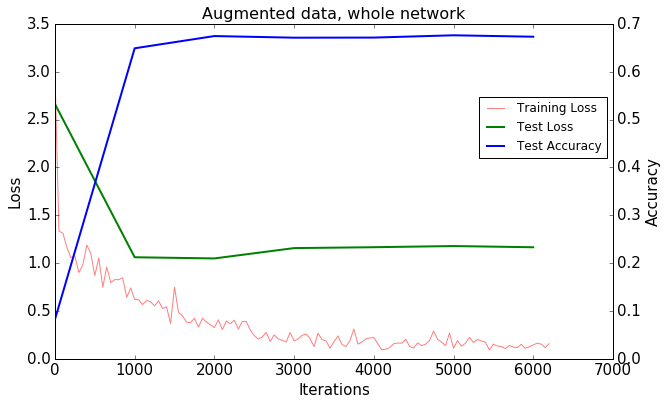

In [18]:
train_log, test_log = pl.parse_log("../transfer-learning/data/alexnet_4/train_8.log")
train_iters = [x['NumIters'] for x in train_log]
train_loss = [x['loss'] for x in train_log]
test_iters = [x['NumIters'] for x in test_log]
test_loss = [x['loss'] for x in test_log]
test_accuracy = [x['accuracy'] for x in test_log]
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting training and test losses
train_l ,= ax1.plot(train_iters, train_loss, color='red',  alpha=.5, label='Training loss')
test_l ,= ax1.plot(test_iters, test_loss, linewidth=2, color='green', label='Test loss')
#ax1.set_ylim(ymin=0, ymax=200)
ax1.set_xlabel('Iterations', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.tick_params(labelsize=15)
#Plotting test accuracy
ax2 = ax1.twinx()
test_acc ,= ax2.plot(test_iters, test_accuracy, linewidth=2, color='blue', label='Test accuracy')
#ax2.set_ylim(ymin=0, ymax=1)
ax2.set_ylabel('Accuracy', fontsize=15)
ax2.tick_params(labelsize=15)
#Adding legend
plt.legend([train_l, test_l, test_acc], ['Training Loss', 'Test Loss', 'Test Accuracy'],  bbox_to_anchor=(1, 0.8))
plt.title('Augmented data, whole network', fontsize=16)
plt.show()

In [19]:
##### Predictions on single test images:

In [20]:
predictions = np.load("../transfer-learning/data/alexnet_4/simple_8", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])
    
score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.705,0.702,0.71,0.705


In [21]:
##### Use same augmentation strategy on test images, and average across predictions

In [22]:
predictions = np.load("../transfer-learning/data/alexnet_4/augmented_8", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])
    
score, metrics, confusion = hc.get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.722,0.718,0.725,0.722


In [5]:
# Compare results of original vs. augmented data

In [25]:
import seaborn as sns

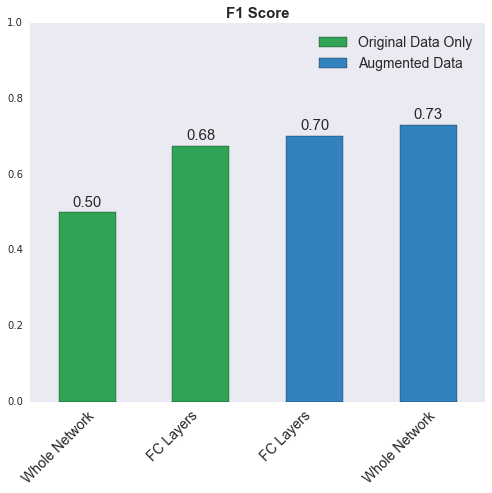

In [52]:
data = [0.501, 0.676, 0.702, 0.731]
labels = ['Whole Network',
         'FC Layers',
         'FC Layers',
         'Whole Network']
colors = ('#31a354', '#3182bd')

fig, ax = plt.subplots(figsize=(7,7))
x = [i + 0.25 for i in range(4)]

ax.bar(x[:2], data[:2], width=0.5, color=colors[0], label='Original Data Only')
ax.bar(x[2:], data[2:], width=0.5, color=colors[1], label='Augmented Data')

ax.set_ylim(0,1)
ax.set_xlim(0, 4)
ax.grid(False)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, size=14)
ax.set_title("F1 Score", size=15, weight='bold')

for l, x, y in zip(data, x, data):
    ax.text(x + 0.5/2, y*1.01, "{:.2f}".format(l), ha='center', va='bottom', size=15)
    
ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('../reports/images/charts/fine_tuning_comparison.pdf', format='pdf', dpi=1200)